#                               PUBG Strategy Analysis

****1.  Overal View of Training Data****

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_column',100)
import matplotlib as mpl # data visualization
from matplotlib.pyplot import figure # data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set(color_codes=True)
import warnings
import os
warnings.filterwarnings("ignore")
train_data = pd.read_csv('../input/train_V2.csv')
train_data.shape

In [ ]:
#Get rid of first three columns
td = pd.read_csv('../input/train_V2.csv', usecols = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
df = pd.DataFrame(td)
df.head() 

In [ ]:
# to see which column has null value, boolean type...
df.isnull().any()

In [ ]:
# get the null value displayed 
df[df.isnull().values==True]

In [ ]:
#get rid of the row with NaN value
df.dropna()

In [ ]:
# to see basic statistics of train data
df.describe()

In [ ]:
#Have a look at the Kills.
dfkills = df['kills'].groupby(df['kills']).count()
plt.figure(figsize=(25,10))
plt.yticks(fontsize=14,rotation='horizontal')
plt.ylabel('Players_Count',fontsize = 26)
plt.title("Number of Kills Distribution",fontsize = 25)
dfkills.plot(kind = 'bar', x = dfkills.index)
plt.xlabel('Number of kills',fontsize = 26)
plt.xticks(fontsize=16,rotation='horizontal')
plt.show()

Most of the players cannot kill even 1 enemy.

In [ ]:
#Have a look at the Assists.
dfassists = df['assists'].groupby(df['assists']).count()
plt.figure(figsize=(25,10))
plt.yticks(fontsize=14,rotation='horizontal')
plt.ylabel('Players_Count',fontsize = 26)
plt.title("Number of Assists Distribution",fontsize = 25)
dfassists.plot(kind = 'bar', x = dfassists.index)
plt.xlabel('Number of Assists',fontsize = 26)
plt.xticks(fontsize=16,rotation='horizontal')
plt.show()

Most of the players cannot damage the enemy player who were  killed by teammates.

In [ ]:
#Have a look at teamKills
sns.set(color_codes=True)
dfteamKills = df['teamKills'].groupby(df['teamKills']).count()
plt.figure(figsize=(25,10))
plt.yticks(fontsize=14,rotation='horizontal')
plt.ylabel('Players_Count',fontsize = 26)
plt.title("teamKills Distribution",fontsize = 25)
dfteamKills.plot(kind = 'bar')
plt.xlabel('teamKills',fontsize = 26)
plt.xticks(fontsize=16,rotation='horizontal')
plt.show()

In [ ]:
print("Most odf players will not kill teammates by mistakes. An interesting thing is that the highest number of teamKills is {:.0f}, while the normal maximum teammates headcount is 4. I assumed this data came from a special match. " .format(dfteamKills.index.max()))

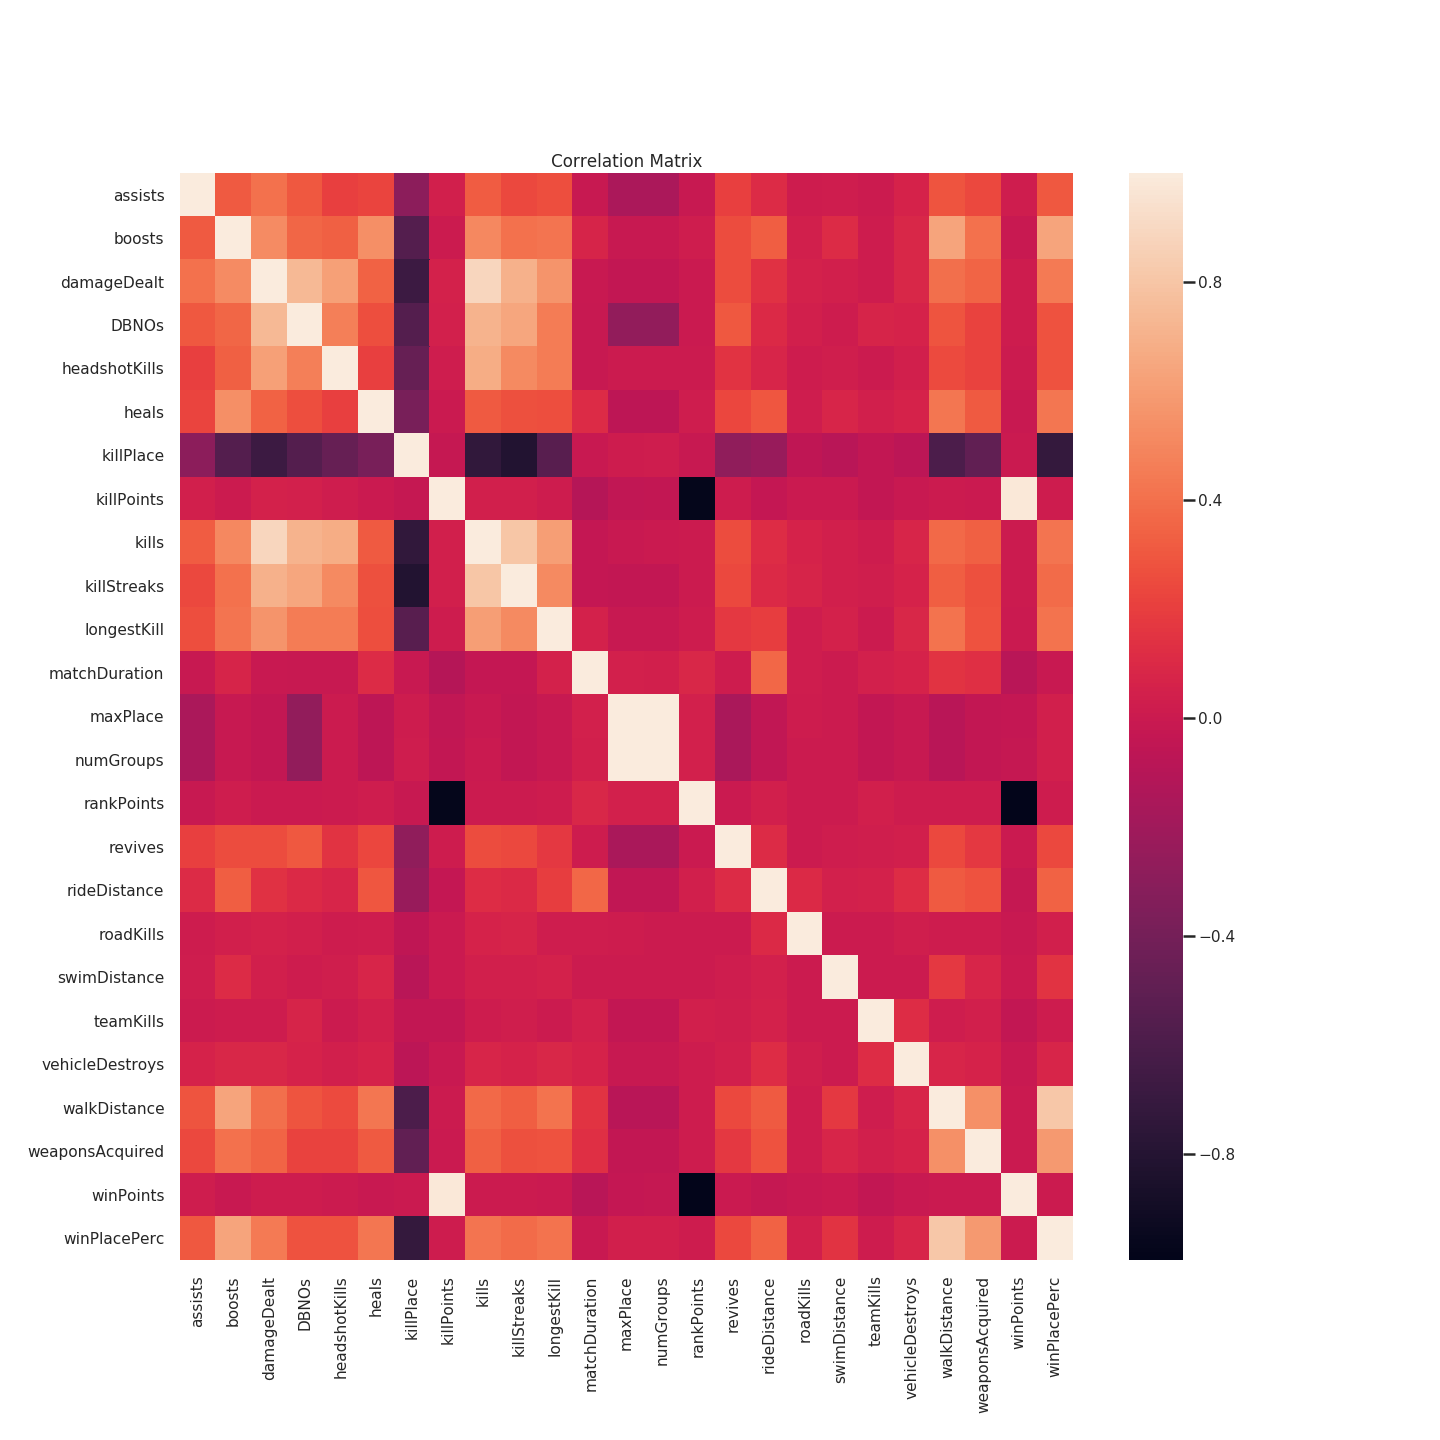

In [ ]:
#correlation matrix table
corrdf = df.corr()
corrdf

In [ ]:
corrdf["damageDealt"].sort_values(ascending=False)
#Result: damageDealt is highly correlated with kills...

In [ ]:
corrdf["teamKills"].sort_values(ascending=False)
#Team kills dose not have a highly correlated column associated with...

                                                        Kills VS. WinPlacePct

People may wonder that how many enemies do I need to kill to win the game.

In [ ]:
sns.set(rc={'figure.figsize':(29,10.27)})
kills = train_data[['kills','winPlacePerc']]
kills_grouped = kills['winPlacePerc'].groupby(kills['kills']).mean()
kills_grouped = pd.DataFrame(kills_grouped)
kills_grouped.plot(kind = 'bar',fontsize = 15)
plt.xlabel('Number of kills',fontsize = 26)
plt.xticks(rotation='horizontal')
plt.ylabel('winPlacePerc',fontsize = 26)
plt.title("Kills VS. winPlacePerc",fontsize = 25)
plt.show()

In [ ]:
print("It is clear that in order to win the game, you have to kill more enemies.To get more than {:.4f} of the probability of wining, you need to kill at least 5 people. The wining probability of killing 10 people is {:.4f}, and the wining probability of killing 15 people is {:.4f}. If you think it is hard for you to kill over 5 players, why not team up with others? Next, we will analyze the game in different game modes. ".format(kills_grouped[kills_grouped.index==5].winPlacePerc.item(),kills_grouped[kills_grouped.index==10].winPlacePerc.item(),kills_grouped[kills_grouped.index==15].winPlacePerc.item()))

                                                                             Game mode analysis

* ![](http://)The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches. Let's find out which game mode has a higher chance to win.

In [ ]:
matchType = train_data[['matchType','winPlacePerc']][(train_data['matchType'] == 'solo') | (train_data['matchType'] == 'duo')| (train_data['matchType'] == 'squad')| (train_data['matchType'] == 'solo-fpp')| (train_data['matchType'] == 'duo-fpp')| (train_data['matchType'] == 'squad-fpp') ]
matchType_grouped = matchType['winPlacePerc'].groupby(matchType['matchType']).mean()
matchType_grouped = pd.DataFrame(matchType_grouped)


In [ ]:
figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
matchType_solo = train_data[['kills']][(train_data['matchType'] == 'solo') |(train_data['matchType'] == 'solo-fpp') ]
matchType_solo_75 = matchType_solo['kills'].quantile(.75)
matchType_solo = matchType_solo['kills'].value_counts()
matchType_solo.plot(kind = 'bar', fontsize = 18)
plt.xlabel('kills',fontsize = 26)
plt.ylabel('Frequence',fontsize = 26)
plt.title("SOLO_Kills_Freq",fontsize = 25)


from matplotlib.pyplot import figure
figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
matchType_duo = train_data[['kills']][(train_data['matchType'] == 'duo') |(train_data['matchType'] == 'duo-fpp') ]
matchType_duo_75 = matchType_duo['kills'].quantile(.75)
matchType_duo = matchType_duo['kills'].value_counts()
matchType_duo.plot(kind = 'bar', fontsize = 18)
plt.xlabel('kills',fontsize = 26)
plt.ylabel('Frequence',fontsize = 26)
plt.title("DUO_Kills_Freq",fontsize = 25)


from matplotlib.pyplot import figure
figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
matchType_squad = train_data[['kills']][(train_data['matchType'] == 'squad') |(train_data['matchType'] == 'squad-fpp') ]
matchType_squad_75 = matchType_squad['kills'].quantile(.75)
matchType_squad = matchType_squad['kills'].value_counts()
matchType_squad.plot(kind = 'bar', fontsize = 18)
plt.xlabel('kills',fontsize = 26)
plt.ylabel('Frequence',fontsize = 26)
plt.title("SQUAD_Kills_Freq",fontsize = 25)
plt.show()


In [ ]:
print("From above figures, it is obvious that even in team modes, it is still difficult to kill over 5 enemies for most players. Some players cannot even kill 1 enemy. " )

                                                                               **Team efforts?**

Some players prefer the solo mode while others may like to play with teammates whom you can cooperate with to kill the enemies and revive you in danger.
So let's see which option has a higher WinPlacePct...

In [ ]:
assists = train_data[['assists','winPlacePerc']]
assists_grouped = assists['winPlacePerc'].groupby(assists['assists']).mean()
sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.set_style("whitegrid")

plt.title('Trend between assists number and WinPct',fontsize = 20)
plt.xlabel('assists_number',fontsize = 15)
plt.ylabel('winPlacePerc',fontsize = 18)
assists_grouped.plot(kind='bar',fontsize = 12 )
plt.show()



In [ ]:
print("1. Corr_Assists_WinPlacePct: For those assists numbers from 0 to 4, higher assists can help your team improve the WinPct." )
print("2. Compared to play in the solo mode, it is obvious that with the help of your teammates, you will have a higher chance to win the game. So let's team up!")

                                                                    Hide or Actively seeking for enemy?

In PUBG, players have tons of strategies to win. Let's discuss two here, hiding in a safe place or actively seeking enemies, which is better?

In [ ]:
walkDistance = train_data[['walkDistance','winPlacePerc']]
sns.set_style('darkgrid')

In [ ]:
WD_1ST = walkDistance['winPlacePerc'][(walkDistance['walkDistance'] >= 0) & (walkDistance['walkDistance'] <5000)].mean()
WD_2ST = walkDistance['winPlacePerc'][(walkDistance['walkDistance'] >= 5000) & (walkDistance['walkDistance'] <10000)].mean()
WD_3ST = walkDistance['winPlacePerc'][(walkDistance['walkDistance'] >= 10000) & (walkDistance['walkDistance'] <15000)].mean()
WD_4ST = walkDistance['winPlacePerc'][(walkDistance['walkDistance'] >= 15000) & (walkDistance['walkDistance'] <20000)].mean()
WD_5ST = walkDistance['winPlacePerc'][(walkDistance['walkDistance'] >= 20000) & (walkDistance['walkDistance'] <=25780)].mean()
WD = {'walkDistance' : ['0-5000M','5000M-10000M','10000M-15000M','15000M-20000M','20000M-25780M'],'winPlacePerc' : [WD_1ST,WD_2ST,WD_3ST,WD_4ST,WD_5ST]}
WDdf = pd.DataFrame(data=WD)
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(data = WDdf, x ='walkDistance', y = 'winPlacePerc' )
plt.xticks(fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel('walkDistance',fontsize = 20)
plt.ylabel('winPlacePerc',fontsize = 20)
plt.title("WalkDistance VS. winPlacePerc",fontsize = 23)
plt.show()



In [ ]:
print("If you stay in a place for a long time instead of walking around, the chance of winning would only be {:.4f}. If you walk over 5000 meters to 10000 meters, your chance will be impeoved by %{:.2f}, which is {:.4f}. So let's bravely go outside and kill the enemy.".format(WD_1ST,100 *(WD_2ST - WD_1ST)/WD_1ST,WD_2ST))

Find a vehicle or nor?

In [ ]:
#rideDistance
rideDistance =  train_data[['rideDistance','winPlacePerc']]
rideDistance = {'Vehicle?': [0,1],'winPlacePerc':[rideDistance['winPlacePerc'][rideDistance['rideDistance'] == 0 ].mean(),rideDistance['winPlacePerc'][rideDistance['rideDistance'] > 0 ].mean()]}
rideDistance = pd.DataFrame(rideDistance)
plt.xticks(fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel('Vehicle?',fontsize = 20)
plt.ylabel('winPlacePerc',fontsize = 20)
plt.title("Vehicle? VS. WinPlacePct",fontsize = 23)
sns.barplot(data = rideDistance, x ='Vehicle?', y = 'winPlacePerc' )
plt.show()

In [ ]:
print("It is necessary to find a vehicle which can save your life when the circle shrinks. Especially in the 4th round of blue circle, you cannot run by foot while feeding yourself with the first aid. If you do have a vehicle, the wining percent will be {:.4f}, otherwise, it will only be {:.4f}.".format(rideDistance['winPlacePerc'][rideDistance['Vehicle?'] == 1 ].mean(),rideDistance['winPlacePerc'][rideDistance['Vehicle?'] == 0 ].mean()))

continue...

In [ ]:
# Additional Analysis
#Standarlization
target = df['winPlacePerc']
#combine features
df_features = df.copy()
size_mapping = {'solo': 1, 'solo-fpp': 1, 'duo': 2,'duo-fpp': 2,'squad': 4,'squad-fpp':4}
df_features['matchType'] = df_features['matchType'].map(size_mapping)
df_features = df_features[pd.notnull(df_features['matchType'])]
df_features
df_features_std = (df_features-df_features.min())/(df_features.max()-df_features.min())

df_features_std
# End of New Codes

In [ ]:
df_corr = df_features_std.corr()
df_features_std.std()

In [ ]:
#GBDT Try
#select features according to its information value IV need to be done...
#Forest to find the top dominant columns...
from numpy.core.umath_tests import inner1d
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
sample = df_features_std.sample(200000)

In [ ]:
y = sample['winPlacePerc']
x = sample.drop(columns = 'winPlacePerc')
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()
gbdt_model = clf.fit(x_train, y_train)  # Training model
y_upper = gbdt_model.predict(x_test)  # predict

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_upper,y_test)
MSE

In [ ]:
test_data = pd.read_csv('../input/test_V2.csv')
test_Id = test_data['Id']
test_x = test_data.drop(columns = ['Id','groupId','matchId'])

In [ ]:
#size_mapping = {'solo': 1, 'solo-fpp': 1, 'duo': 2,'duo-fpp': 2,'squad': 4,'squad-fpp':4}
#test_x['matchType'] = test_x['matchType'].map(size_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
test_x['matchType'] = number.fit_transform(test_x['matchType'].astype('str'))

In [ ]:
y_final = gbdt_model.predict(test_x)

In [ ]:
test_Id = pd.DataFrame(test_Id)
predic = pd.DataFrame({'Id' : test_Id['Id'], 'winPlacePerc' : y_final})
predic.to_csv("submission.csv", index=False)